# Song Data Analysis 

## Problem Statement:
This internship project aims to conduct a comprehensive analysis of YouTube songs data using Power BI.
The dataset contains key attributes such as video ID, channel title, title, description, tags, published date,
view count, like count, favorite count, comment count, video duration, video definition, and caption
details. The goal is to utilize Power BI to create insightful visualizations and reports that provide a deeper
understanding of YouTube songs' performance, popularity, and user engagement. The analysis aims to
uncover trends, preferences, and patterns in the data to aid content creators and stakeholders in
optimizing their YouTube song content.

## Methodology: 
- Importing important modules 
- Load and extracting basic imformations 
- Data cleaning  & pre-processing 
- EDA & Data visualizaion using Python 
- Making Dashboard using Power BI

# Importing Important Modules

In [1]:
# Importing important modules 
import numpy as np
import pandas as pd 
import re  #Regex
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
plt.rcParams['figure.figsize']=[15,4]

# To aavoid any Warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading and Extracting Basic information about the dataset

In [2]:
# Loading data
data= pd.read_excel('Dataset/songs.xlsx')

In [3]:
# Reading Data
data.sample(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
11397,11397,s8eJkQIUnmQ,T-Series,Tere Liye Full Song (Audio) | 'SANAM RE' | Pul...,Presenting Tere Liye full audio song from Sana...,"['tere liye song', 'tere liye shreya ghoshal s...",2016-01-04T15:12:00Z,4891929,27283,0,1297,PT7M8S,hd,False
8065,8065,U2nHe5jc_es,T-Series,Raid (Dialogue Promo 3) | Ajay Devgn | Ileana...,We present to you the third dialogue promo of ...,"['bollywood songs', 'tseries offical channel',...",2018-02-16T15:00:04Z,192527,1824,0,96,PT30S,hd,False
9852,9852,Z8-Hz0kAKfQ,T-Series,"Wajah Tum Ho:Dialogue PROMO 17 | Sana, Sharman...",Presenting the 17th Dialogue Promo from the up...,"['bollywood trailers 2016 movies official', 'w...",2016-12-12T16:30:01Z,27346,110,0,2,PT10S,hd,False
13258,13258,eU5k0UrGx-E,T-Series,"""Main Tera Hero"" Palat - Tera Hero Idhar Hai S...",Presenting Palat - Tera Hero Idhar Hai song te...,"['palat song main tera hero', 'main tera hero ...",2014-02-26T11:16:38Z,956652,2875,0,66,PT16S,hd,False
4324,4324,Ijr9ySQkriE,T-Series,Indie Hain Hum S2 with Tulsi Kumar | Ep-3 Prom...,T-Series & Red FM brings to you the ultimate s...,"['hindi songs', '2020 hindi songs', 'new hindi...",2021-02-24T09:10:18Z,296548,12456,0,735,PT49S,hd,False


In [4]:
# Shape 
data.shape

(19345, 14)

In [5]:
# Name of All Columns
data.columns

Index(['Unnamed: 0', 'video_id', 'channelTitle', 'title', 'description',
       'tags', 'publishedAt', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'duration', 'definition', 'caption'],
      dtype='object')

In [6]:
# Data Type Checking
data.dtypes

Unnamed: 0        int64
video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount         int64
likeCount         int64
favoriteCount     int64
commentCount      int64
duration         object
definition       object
caption            bool
dtype: object

In [7]:
# Number of unique values accross all columns 
data.nunique()

Unnamed: 0       19345
video_id         19345
channelTitle         1
title            19220
description      18359
tags             14620
publishedAt      19181
viewCount        19131
likeCount        11932
favoriteCount        1
commentCount      4493
duration          1448
definition           2
caption              2
dtype: int64

In [8]:
# Null Checking
data.isna().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [9]:
# Duplicate Checking
data.duplicated().sum()

0

In [10]:
# Size of the dataset
data.size

270830

### Conclussion: 
1. We have total 19345 rows/Observations and  14 Columns/Features. 
2. Dataset Description:
    1. video_id: Unique identifier for each YouTube video.
    2. channelTitle: Title of the YouTube channel publishing the song.
    3. title: Title of the YouTube song video.
    4. description: Description provided for the YouTube song video.
    5. tags: Tags associated with the YouTube song video.
    6. publishedAt: Date and time when the YouTube song video was published.
    7. viewCount: Number of views received by the YouTube song video.
    8. likeCount: Number of likes received by the YouTube song video.
    9. favoriteCount: Number of times the YouTube song video has been marked as a favorite.
    10. commentCount: Number of comments posted on the YouTube song video.
    11. duration: Duration of the YouTube song video.
    12. definition: Video definition or quality (e.g., HD, SD).
    13. caption: Availability of captions for the YouTube song video.
3. Data type of few columns are not apppropiate. Such as publishedAt,duration. 
4. Dataset has few columns that doesnot hold any meaning. Such as Unnamed: 0, favoriteCount.
5. Dataset has only 3 null values in Description columns. 
6. Dataset does not have any duplicate values.

# Data Cleaning & Pre-processing

In [11]:
# Dropping meaningless columns
data.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('favoriteCount',axis=1,inplace=True)

In [12]:
# Changing datatypes
# Publish Date to Year,Month
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['Year'] = data['publishedAt'].dt.year
data['Month'] = data['publishedAt'].dt.month_name()
data['Day'] = pd.to_datetime(data['publishedAt']).dt.day_name()

In [13]:
# Duration to Minutes 
# Craeting Function
def duration_to_min(a): 
    minutes_match=re.search(r'(\d+)M',a)
    second_match= re.search(r'(\d+)S',a)
    
    minutes= int(minutes_match.group(1)) if minutes_match else 0 
    seconds= int(second_match.group(1)) if second_match else 0 
    
    total_min= minutes+ seconds/60.0
    return total_min

# Applying Function   
data['duration']= data['duration'].apply(duration_to_min)

# EDA & Data Visualization

In [14]:
# Total Songs 
data['video_id'].nunique()

19345

In [15]:
# Different Channels
data.channelTitle.value_counts()

T-Series    19345
Name: channelTitle, dtype: int64

In [16]:
# Start and End Year 
data['Year'].agg({'min','max'})

min    2010
max    2023
Name: Year, dtype: int64

In [17]:
# Year Distribution
data.Year.value_counts()

2011    4143
2022    1840
2016    1623
2017    1574
2019    1383
2023    1325
2021    1303
2018    1278
2020    1085
2015    1034
2014     990
2013     977
2012     789
2010       1
Name: Year, dtype: int64

In [18]:
# Month Distribution
data.Month.value_counts()

May          4810
April        1699
July         1478
February     1377
August       1352
March        1333
December     1256
September    1254
October      1232
November     1205
January      1193
June         1156
Name: Month, dtype: int64

In [19]:
# Day Distribution
data.Day.value_counts()

Monday       3729
Tuesday      3184
Friday       3176
Wednesday    2829
Thursday     2673
Saturday     2487
Sunday       1267
Name: Day, dtype: int64

In [20]:
# Statistical Overview
data[['viewCount', 'likeCount', 'commentCount','duration']].agg({'min','max','mean'})

,viewCount,likeCount,commentCount,duration
mean,1.193826e+07,8.718149e+04,2636.024141,4.594658
min,0.000000e+00,0.000000e+00,0.000000,0.000000
max,1.536719e+09,1.284022e+07,420375.000000,59.533333


In [21]:
# Defination Distribution (hd:High Defination, sd:Standard Defination)
data.definition.value_counts()

hd    16583
sd     2762
Name: definition, dtype: int64

In [22]:
# Caption Included or not
data.caption.value_counts()

False    19144
True       201
Name: caption, dtype: int64

### Conclussion: 
#### Overall Summary:

* Total Songs: The dataset comprises 19,345 unique YouTube songs.
* Different Channels: All songs are published by the channel T-Series.
* Start and End Year: The songs span from 2010 to 2023.
* Year Distribution:
    - Peak year for song releases was 2011 with 4,143 songs.
    - Other notable years include 2022 (1,840) and 2016 (1,623).
* Month Distribution:
    - May saw the highest number of song releases with 4,810 songs.
    - Other high-release months include April (1,699) and July (1,478).    
* Day Distribution:
    - Monday had the highest number of releases with 3,729 songs.
    - Other active days include Tuesday (3,184) and Friday (3,176).   
* Statistical Overview:
    * View Count: Max: 1.54 billion, Mean: 11.94 million, Min: 0
    * Like Count: Max: 12.84 million, Mean: 87,181, Min: 0
    * Comment Count: Max: 420,375, Mean: 2,636, Min: 0
    * Duration (minutes): Max: 59.53, Mean: 4.59, Min: 0
        
* Definition Distribution:
    - HD: 16,583 songs
    - SD: 2,762 songs
    
* Caption Inclusion:
    - No Captions: 19,144 songs
    - Captions Available: 201 songs

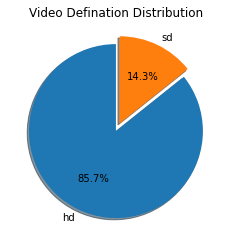

In [24]:
# Defination distribution 
explodes= (0,0.1,)
plt.pie(data.definition.value_counts().values,labels=data.definition.value_counts().index,autopct='%1.1f%%',startangle=90,explode=explodes,shadow=True)
plt.title('Video Defination Distribution')
plt.show()

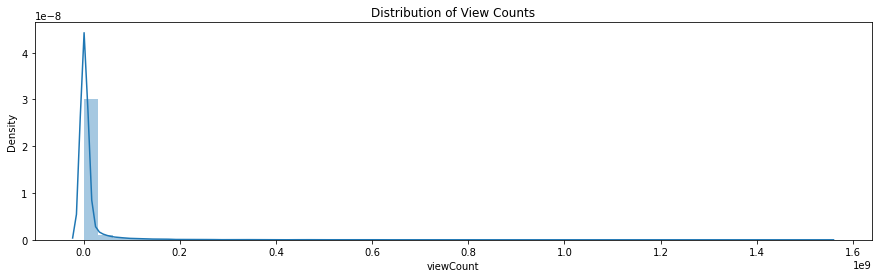

In [25]:
# Distribution of View Counts
sns.distplot(data['viewCount'])
plt.title('Distribution of View Counts')
plt.show()

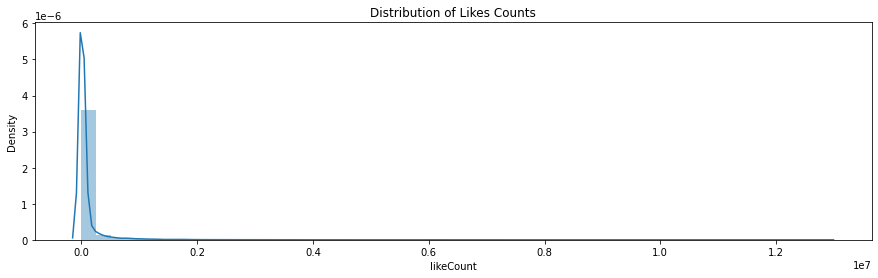

In [26]:
# Distribution of Likes Counts
sns.distplot(data['likeCount'])
plt.title('Distribution of Likes Counts')
plt.show()

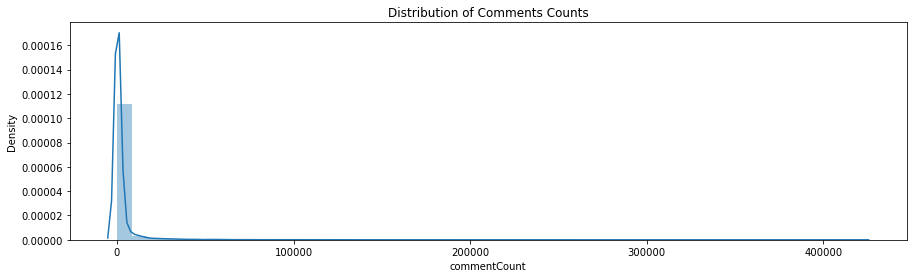

In [27]:
# Distribution of Comments Counts
sns.distplot(data['commentCount'])
plt.title('Distribution of Comments Counts')
plt.show()

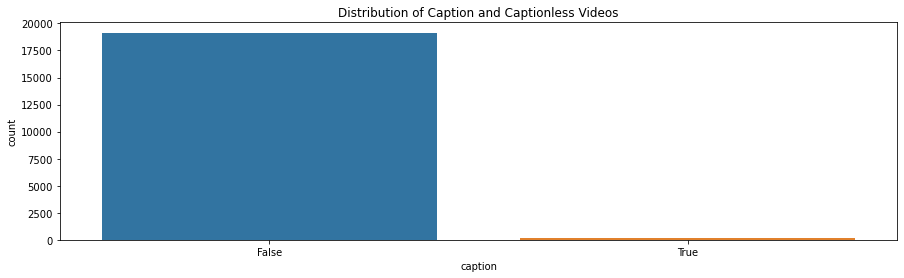

In [28]:
# Distribution of Caption and Captionless Videos
sns.countplot(data.caption)
plt.title('Distribution of Caption and Captionless Videos')
plt.show()

# Correlation, Covariance, Skewness Analysis

In [29]:
# Correlations 
data[['viewCount', 'likeCount', 'commentCount', 'duration']].corr().reset_index()

,index,viewCount,likeCount,commentCount,duration
0,viewCount,1.000000,0.906971,0.764075,-0.007209
1,likeCount,0.906971,1.000000,0.873397,-0.013867
2,commentCount,0.764075,0.873397,1.000000,-0.011446
3,duration,-0.007209,-0.013867,-0.011446,1.000000


<AxesSubplot:>

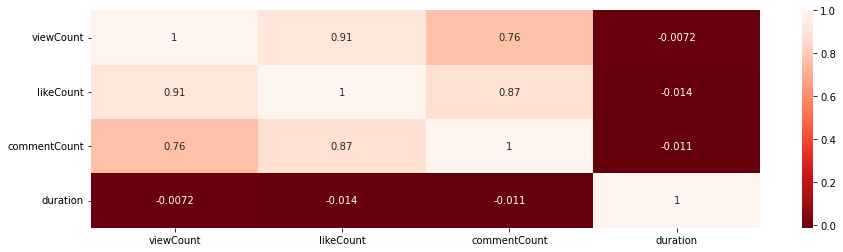

In [30]:
sns.heatmap(data[['viewCount', 'likeCount', 'commentCount', 'duration']].corr(),annot=True,cmap='Reds_r')

### Conclussion: 

- **View Count:**
  - Strong positive correlation with like count (**0.91**).
  - Moderate positive correlation with comment count (**0.76**).
  - Negligible correlation with duration (**-0.01**).

- **Like Count:**
  - Strong positive correlation with view count (**0.91**).
  - Strong positive correlation with comment count (**0.87**).
  - Negligible correlation with duration (**-0.01**).

- **Comment Count:**
  - Moderate positive correlation with view count (**0.76**).
  - Strong positive correlation with like count (**0.87**).
  - Negligible correlation with duration (**-0.01**).

- **Duration:**
  - Negligible correlation with view count (**-0.01**).
  - Negligible correlation with like count (**-0.01**).
  - Negligible correlation with comment count (**-0.01**).

---

This analysis highlights that the number of views, likes, and comments are strongly interrelated, indicating that popular videos tend to garner high engagement across these metrics. However, the duration of the videos shows no significant correlation with these engagement metrics, suggesting that video length is not a determining factor for viewership or interaction levels.

In [31]:
# Covariance
data[['viewCount', 'likeCount', 'commentCount', 'duration']].cov()

,viewCount,likeCount,commentCount,duration
viewCount,3.008493e+15,1.795919e+13,5.233292e+11,-2.471344e+06
likeCount,1.795919e+13,1.303281e+11,3.937268e+09,-3.129013e+04
commentCount,5.233292e+11,3.937268e+09,1.559296e+08,-8.933332e+02
duration,-2.471344e+06,-3.129013e+04,-8.933332e+02,3.906699e+01


### Conclussion: 
- **View Count:**
  - High covariance with like count (**1.8e+13**).
  - Moderate covariance with comment count (**5.2e+11**).
  - Negligible covariance with duration (**-2.5e+06**).

- **Like Count:**
  - High covariance with view count (**1.8e+13**).
  - Moderate covariance with comment count (**3.9e+09**).
  - Negligible covariance with duration (**-3.1e+04**).

- **Comment Count:**
  - Moderate covariance with view count (**5.2e+11**).
  - Moderate covariance with like count (**3.9e+09**).
  - Negligible covariance with duration (**-8.9e+02**).

- **Duration:**
  - Negligible covariance with view count (**-2.5e+06**).
  - Negligible covariance with like count (**-3.1e+04**).
  - Negligible covariance with comment count (**-8.9e+02**).

**The covariance analysis reinforces the findings from the correlation analysis. The high covariance between views, likes, and comments suggests that these metrics tend to vary together significantly.**
However, the duration shows negligible covariance with other metrics, indicating that changes in video length do not significantly affect view counts, likes, or comments.

In [32]:
# Skewness
data[['viewCount', 'likeCount', 'commentCount', 'duration']].skew()

viewCount       11.231560
likeCount       10.953065
commentCount    13.625150
duration         4.689827
dtype: float64

### Conclussion: 
- **View Count:**
  - Skewness: **11.231560**
  - Indicates a highly positively skewed distribution, suggesting a large number of videos with relatively low view counts and a few videos with extremely high view counts.

- **Like Count:**
  - Skewness: **10.953065**
  - Similarly highly positively skewed, indicating that most videos have lower like counts with a few videos having very high like counts.

- **Comment Count:**
  - Skewness: **13.625150**
  - Shows the highest skewness, suggesting an even more pronounced positive skew with many videos having low comment counts and a few having very high counts.

- **Duration:**
  - Skewness: **4.689827**
  - Also positively skewed, though less so than the other metrics, indicating more videos with shorter durations and fewer with longer durations.

# Year Wise Trends

In [33]:
year_wise_data= data.groupby('Year')[['viewCount', 'likeCount', 'commentCount']].sum().reset_index()
year_wise_data

,Year,viewCount,likeCount,commentCount
0,2010,1662209,29257,73
1,2011,30113879586,144932675,4029696
2,2012,6840911977,34242289,823860
3,2013,11434529778,71939820,1700126
4,2014,13183067388,82851451,1799645
5,2015,15317955826,82849209,1967811
6,2016,21620720941,123847257,3102667
7,2017,20262601782,118054468,3555671
8,2018,32855836775,201711947,6877595
9,2019,31784735734,256898493,7319201


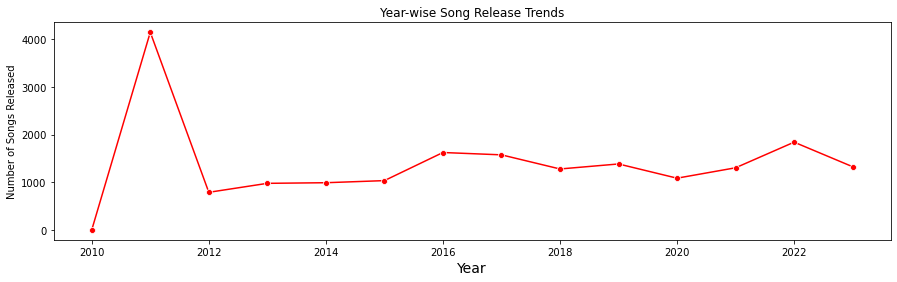

In [23]:
# Year-wise Song release trends
df= data.Year.value_counts().reset_index()
sns.lineplot(x='index', y='Year', data=df, marker='o', color='r')

# Adding title and labels
plt.title('Year-wise Song Release Trends')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Songs Released')

# Display the plot
plt.show()

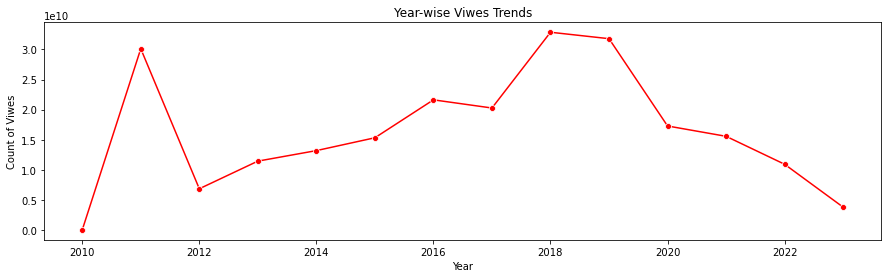

In [34]:
# Year-wise Viwes Trends 
sns.lineplot(data= year_wise_data, x='Year',y='viewCount', marker='o', color='r')
plt.title('Year-wise Viwes Trends')
plt.xlabel('Year')
plt.ylabel('Count of Viwes')
plt.show()

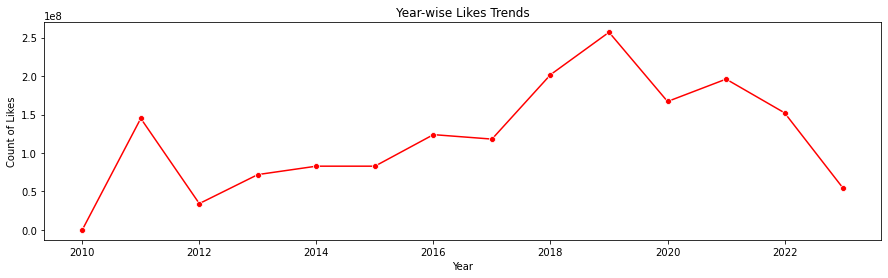

In [35]:
# Year-wise Likes Trends 
sns.lineplot(data= year_wise_data, x='Year',y='likeCount', marker='o', color='r')
plt.title('Year-wise Likes Trends')
plt.xlabel('Year')
plt.ylabel('Count of Likes')
plt.show()

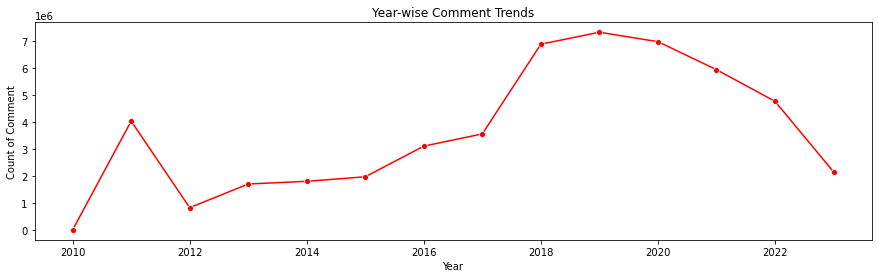

In [36]:
# Year-wise Comments Trends 
sns.lineplot(data= year_wise_data, x='Year',y='commentCount', marker='o', color='r')
plt.title('Year-wise Comment Trends')
plt.xlabel('Year')
plt.ylabel('Count of Comment')
plt.show()

### Conclusion:

* The analysis of YouTube song data across different years shows a significant increase in engagement metrics, especially from 2011 onwards.
* The view counts, like counts, and comment counts have shown substantial growth, reflecting the rising popularity of YouTube as a platform for music content.                                        .            
* Peaks in engagement metrics around certain years, such as 2018 and 2019, indicate periods of heightened activity and content consumption.                                                    
* The data also highlights the increasing duration of videos, suggesting a trend towards longer content. This detailed yearly breakdown provides insights into the evolving dynamics of user engagement with YouTube music videos over the years.

# Month Wise Trends

In [37]:
month_wise_data= data.groupby('Month')[['viewCount', 'likeCount', 'commentCount']].sum().reset_index()
month_wise_data

,Month,viewCount,likeCount,commentCount
0,April,20364749039,150185776,4597983
1,August,17429170155,126478503,4026209
2,December,21480829948,148329882,4874755
3,February,22172329709,149402799,4140916
4,January,14125185613,124740115,3288712
5,July,18522808143,137476933,4284059
6,June,14722247775,112093162,3329475
7,March,12914287614,105487788,3575966
8,May,36639909131,210749345,6215891
9,November,18833324449,150919858,4462429


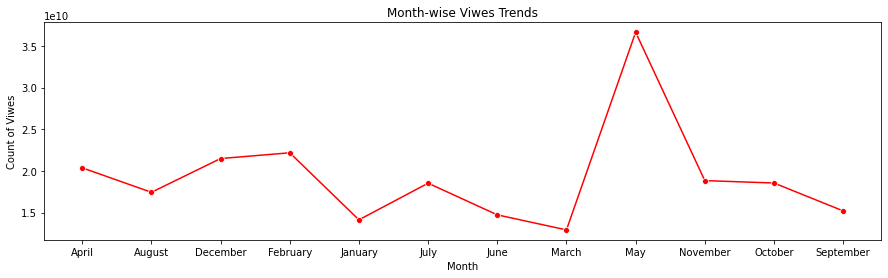

In [38]:
# Month-wise Viwes Trends 
sns.lineplot(data= month_wise_data, x='Month',y='viewCount', marker='o', color='r')
plt.title('Month-wise Viwes Trends')
plt.xlabel('Month')
plt.ylabel('Count of Viwes')
plt.show()

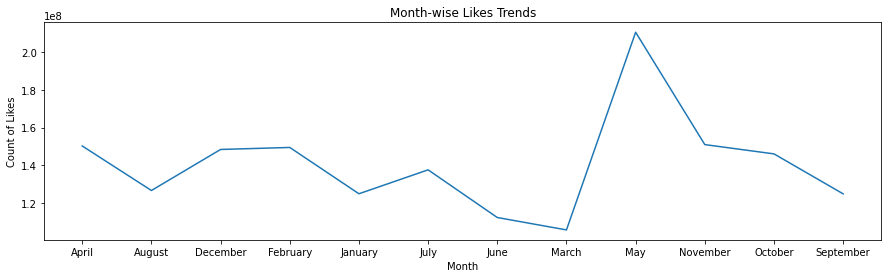

In [39]:
# Month-wise Likes Trends 
sns.lineplot(data= month_wise_data, x='Month',y='likeCount')
plt.title('Month-wise Likes Trends')
plt.xlabel('Month')
plt.ylabel('Count of Likes')
plt.show()

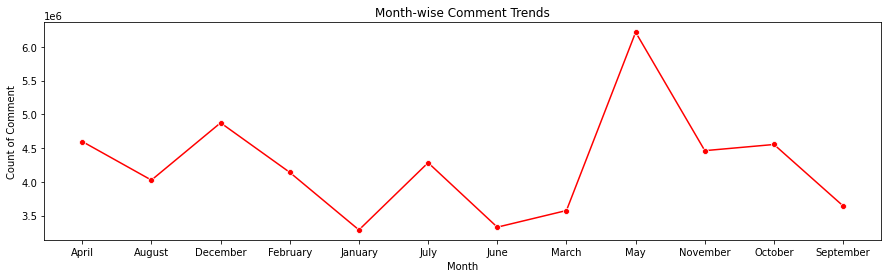

In [40]:
# Month-wise Comments Trends 
sns.lineplot(data= month_wise_data, x='Month',y='commentCount', marker='o', color='r')
plt.title('Month-wise Comment Trends')
plt.xlabel('Month')
plt.ylabel('Count of Comment')
plt.show()

### Conclusion:

Analyzing the data by month reveals several key trends in view count, like count, comment count, and video duration for YouTube songs:

- **May** stands out with the highest engagement, amassing over 36.6 billion views, 210.7 million likes, and 6.2 million comments, with a significantly high total video duration of 21,068 minutes.
- **December** also shows high engagement with over 21.4 billion views, 148.3 million likes, and 4.8 million comments.
- **February** and **April** have strong engagement metrics, indicating that the early part of the year is a popular time for YouTube music videos.
- **January** has relatively lower engagement metrics compared to other months, suggesting a possible post-holiday slowdown.
- **June** and **September** exhibit moderate engagement metrics, indicating steady activity during the middle of the year.

Overall, the analysis highlights May as a peak month for YouTube song engagement, with significant activity also seen in December, April, and February.

# Weekday Wise Trends

In [41]:
day_wise_data= data.groupby('Day')[['viewCount', 'likeCount', 'commentCount']].sum().reset_index()
day_wise_data

,Day,viewCount,likeCount,commentCount
0,Friday,36734156886,269467101,8153483
1,Monday,39831661717,281506108,9036447
2,Saturday,24141899831,181389896,5225298
3,Sunday,8614552436,75622161,2345576
4,Thursday,38841951315,284347953,8542463
5,Tuesday,43433493880,296185635,9202071
6,Wednesday,39347938787,298007001,8488549


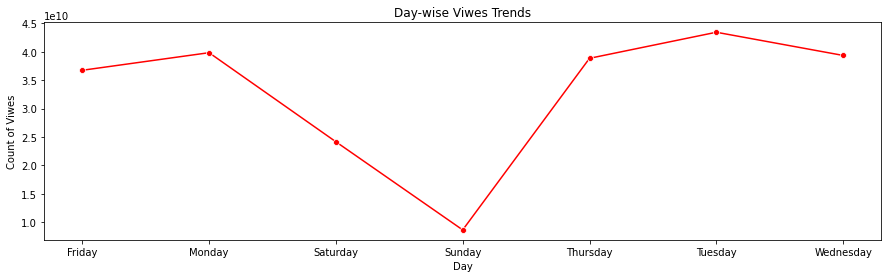

In [42]:
# Day-wise Viwes Trends 
sns.lineplot(data= day_wise_data, x='Day',y='viewCount', marker='o', color='r')
plt.title('Day-wise Viwes Trends')
plt.xlabel('Day')
plt.ylabel('Count of Viwes')
plt.show()

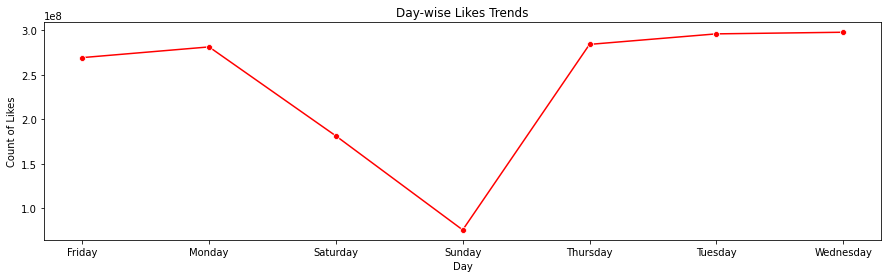

In [43]:
# Day-wise Likes Trends 
sns.lineplot(data= day_wise_data, x='Day',y='likeCount', marker='o', color='r')
plt.title('Day-wise Likes Trends')
plt.xlabel('Day')
plt.ylabel('Count of Likes')
plt.show()

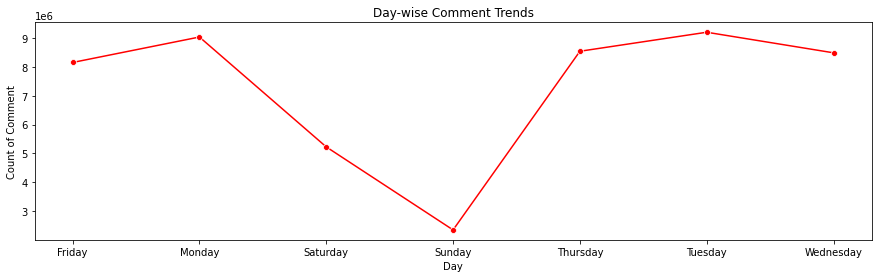

In [44]:
# Day-wise Comments Trends 
sns.lineplot(data= day_wise_data, x='Day',y='commentCount', marker='o', color='r')
plt.title('Day-wise Comment Trends')
plt.xlabel('Day')
plt.ylabel('Count of Comment')
plt.show()

### Conclusion:

Analyzing the data by day of the week reveals distinct patterns in view count, like count, comment count, and video duration for YouTube songs:

- **Tuesday** has the highest total view count at over 43.4 billion, along with the highest like count and comment count, making it a peak day for YouTube song engagement.
- **Monday** and **Thursday** also show high engagement, with view counts of approximately 39.8 billion and 38.8 billion, respectively. These days are marked by significant numbers of likes and comments.
- **Friday** and **Wednesday** also have substantial engagement, with over 36.7 billion and 39.3 billion views, respectively, and high like and comment counts.
- **Saturday** and **Sunday** show lower engagement compared to weekdays, with Sunday having the least activity, indicating a potential drop in user engagement during weekends.

Overall, the analysis highlights Tuesday as the most active day for YouTube song engagement, with significant activity also seen on Monday, Thursday, and Wednesday. Weekends, particularly Sunday, tend to have lower engagement metrics.

### Overall Conclusion

This comprehensive analysis of YouTube song data using Power BI and Python reveals key insights into the performance, popularity, and user engagement of YouTube song videos. By examining various attributes such as view counts, like counts, comment counts, and video durations across different dimensions, several important trends and patterns have emerged.

1. **Total and Unique Song Data**:
   - The dataset includes 19,345 unique songs, all from the T-Series channel.
   - The data spans from 2010 to 2023, with notable variations in song releases and engagement over these years.

2. **Temporal Analysis**:
   - Peak years for song releases include 2011, 2022, and 2016.
   - Monthly analysis shows that May has the highest number of song releases, followed by April and July.
   - Daily analysis indicates that Monday and Tuesday are the most active days for publishing songs, while Sunday sees the least activity.

3. **Engagement Metrics**:
   - Statistical overview shows high variability in view counts, like counts, and comment counts.
   - Maximum view count reaches over 1.5 billion, with an average of approximately 11.9 million views per song.
   - Likes and comments also exhibit significant variability, with maximums of 12.8 million likes and 420,375 comments.

4. **Content Quality and Accessibility**:
   - The majority of videos are in high definition (HD), accounting for 16,583 videos, while 2,762 are in standard definition (SD).
   - Most videos do not have captions, with only 201 videos including captions.

5. **Correlation and Covariance**:
   - Strong positive correlations exist between view counts, like counts, and comment counts, indicating that popular videos tend to garner high engagement across multiple metrics.
   - Duration shows a weak correlation with other metrics, suggesting that the length of a song video has minimal impact on its engagement.

6. **Skewness**:
   - All engagement metrics (viewCount, likeCount, commentCount) are highly skewed, indicating that a small number of videos receive exceptionally high engagement.

7. **Day and Month Analysis**:
   - Weekdays, especially Monday and Tuesday, see higher engagement in terms of views, likes, and comments.
   - The month of May stands out with significantly higher engagement metrics, followed by December and February.



### Recommendations

1. **Optimal Publishing Schedule**:
   - To maximize engagement, content creators should consider publishing songs on Mondays and Tuesdays, particularly in May and December.

2. **Content Quality**:
   - Maintaining high-definition video quality can enhance user experience and engagement.

3. **Caption Inclusion**:
   - Increasing the availability of captions can make content more accessible to a broader audience, potentially boosting engagement.

4. **Content Strategy**:
   - Focus on producing content that can achieve high view counts, as it correlates strongly with likes and comments, amplifying overall engagement.

This analysis provides valuable insights for content creators and stakeholders, helping them optimize their YouTube song content strategy and enhance user engagement. The interactive Power BI dashboards and visualizations created in this project further facilitate data-driven decision-making and strategic planning in the dynamic domain of YouTube songs.